In [2]:
import csv
import pandas as pd
import numpy as np
import math

In [74]:
patient_data = './coronavirusdataset/patient.csv'
route_data = './coronavirusdataset/route.csv'
time_data = './coronavirusdataset/time.csv'

with open(patient_data, errors='ignore') as f:
    patient = pd.read_table(f, delimiter=',', sep=',')    
index=list(range(len(patient)))
df_patient = pd.DataFrame(patient, index=index)

with open(route_data, errors='ignore') as f:
    route = pd.read_table(f, delimiter=',', sep=',')    
index=list(range(len(patient)))
df_route = pd.DataFrame(route, index=index)

with open(time_data, errors='ignore') as f:
    time = pd.read_table(f, delimiter=',', sep=',')    
index=list(range(len(time)))
df_time = pd.DataFrame(time, index=index)

# df_patient = pd.concat([df_patient, pd.get_dummies(df_patient['state'], prefix='state')], axis=1)
df_patient = pd.concat([df_patient, pd.get_dummies(df_patient['sex'], prefix='sex')], axis=1)
df_patient = pd.concat([df_patient, pd.get_dummies(df_patient['country'], prefix='country')], axis=1)
df_patient = pd.concat([df_patient, pd.get_dummies(df_patient['region'], prefix='region')], axis=1)
df_patient = pd.concat([df_patient, pd.get_dummies(df_patient['group'], prefix='group')], axis=1)
df_patient = pd.concat([df_patient, pd.get_dummies(df_patient['infection_reason'], prefix='infection_reason')], axis=1)
df_patient = df_patient.drop(['id','sex','country','region','group','infection_reason'], axis=1)

df_patient['released_date'] = pd.to_datetime(df_patient['released_date'])
df_patient['deceased_date'] = pd.to_datetime(df_patient['deceased_date'])
df_patient['confirmed_date'] = pd.to_datetime(df_patient['confirmed_date'])

df_patient = df_patient.drop(['released_date', 'deceased_date','confirmed_date'], axis=1)
df_patient = df_patient.drop(['infection_order', 'infected_by', 'contact_number','birth_year'], axis=1)



cols = list(df_patient)
cols.insert(0, cols.pop(cols.index('state')))
# print(cols)
df_patient = df_patient.loc[:, cols]
df_patient = df_patient.dropna(axis=0)

# print(df_patient['state'])
print(df_patient.info(1))
print(df_patient.head(0))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5765 entries, 0 to 5765
Data columns (total 41 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   state                                               5765 non-null   object
 1   sex_female                                          5765 non-null   uint8 
 2   sex_male                                            5765 non-null   uint8 
 3   country_China                                       5765 non-null   uint8 
 4   country_Korea                                       5765 non-null   uint8 
 5   country_Mongolia                                    5765 non-null   uint8 
 6   region_Busan                                        5765 non-null   uint8 
 7   region_Chungcheongbuk-do                            5765 non-null   uint8 
 8   region_Chungcheongnam-do                            5765 non-null   uint8 
 9   region_D

In [75]:
col_names = []
for i in df_patient.head(0):
    col_names.append(i)
    
print(col_names)

['state', 'sex_female', 'sex_male', 'country_China', 'country_Korea', 'country_Mongolia', 'region_Busan', 'region_Chungcheongbuk-do', 'region_Chungcheongnam-do', 'region_Daegu', 'region_Daejeon', 'region_Gangwon-do', 'region_Gwangju', 'region_Gyeongsangbuk-do', 'region_Jeju-do', 'region_Jeollabuk-do', 'region_Jeollanam-do', 'region_Ulsan', 'region_capital area', 'region_filtered at airport', 'group_Cheongdo Daenam Hospital', "group_Eunpyeong St. Mary's Hospital", 'group_Myungsung church', 'group_Onchun Church', 'group_Pilgrimage', 'group_Shincheonji Church', 'infection_reason_ visit to China', 'infection_reason_contact with patient', 'infection_reason_contact with patient in Japan', 'infection_reason_contact with patient in Singapore', 'infection_reason_pilgrimage to Israel', 'infection_reason_residence in Wuhan', 'infection_reason_visit to Cheongdo Daenam Hospital', 'infection_reason_visit to China', 'infection_reason_visit to Daegu', 'infection_reason_visit to Italy', 'infection_reas

In [76]:
print(df_patient['state'])

0       released
1       released
2       released
3       released
4       released
          ...   
5761    isolated
5762    isolated
5763    isolated
5764    isolated
5765    isolated
Name: state, Length: 5765, dtype: object


In [77]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1176437584606982278,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 4828102656
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 11151983518432288977
 physical_device_desc: "device: 0, name: GeForce RTX 2060, pci bus id: 0000:06:00.0, compute capability: 7.5"]

훈련 세트 정확도: 0.993
테스트 세트 정확도: 0.993
특성 중요도:
[0.01022182 0.0435415  0.         0.         0.         0.
 0.         0.         0.11511468 0.         0.         0.03149673
 0.00362228 0.         0.         0.         0.         0.0359918
 0.         0.22570293 0.         0.         0.         0.
 0.02799749 0.         0.10470435 0.         0.         0.
 0.         0.         0.         0.00070639 0.         0.
 0.         0.         0.         0.40090003]


<IPython.core.display.Javascript object>


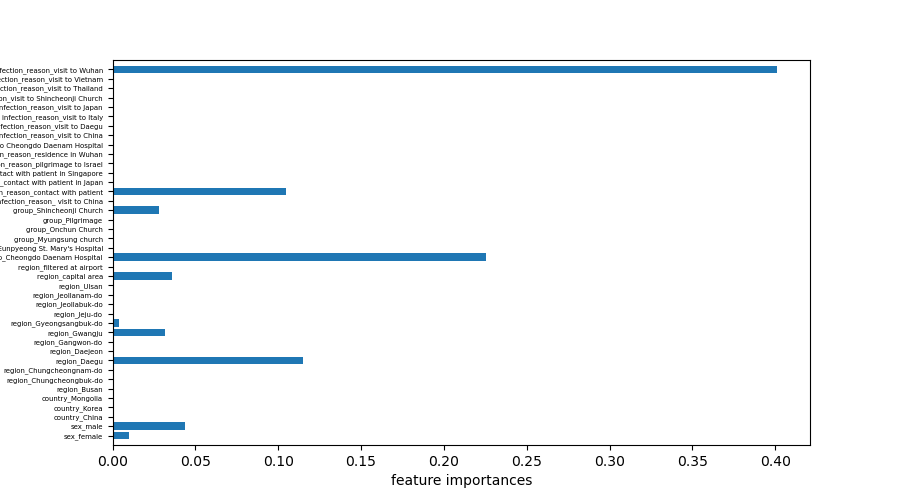

In [81]:
#Do decision-tree
#random setting for training set and test set
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt

X = df_patient.values[:,1:]
Y = df_patient.values[:,0]     

train_X, test_X, train_Y, test_Y = train_test_split(X,Y, train_size=0.8, test_size=0.2, random_state=123)

tree1 = DecisionTreeClassifier(criterion="gini", splitter='best', max_leaf_nodes=None, min_samples_leaf=5, max_depth=None)

clf = tree1.fit(X,Y)
clf = tree1.fit(X=train_X, y=train_Y)
clf.feature_importances_ # [ 1.,  0.,  0.]
clf.score(X=test_X, y=test_Y) # 1.0

feature_names = col_names[1:]
class_names = ['deceased', 'confirmed', 'released']

dot_data = tree.export_graphviz(clf, out_file=None, proportion=False, filled=True, 
                                feature_names=feature_names, class_names=class_names, 
                                rounded=True, special_characters=True, impurity=False)
graph = graphviz.Source(dot_data)
graph.format='png'
graph.render('./tree_corona.png')

print("훈련 세트 정확도: {:.3f}".format(clf.score(train_X, train_Y)))
print("테스트 세트 정확도: {:.3f}".format(clf.score(test_X, test_Y)))
print("특성 중요도:\n{}".format(clf.feature_importances_))

plt.rc('font', family='AppleGothic')

def plot_feature_importances(model):
    plt.figure(figsize=(9,5))
    n_features = X.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names, fontsize=5)
    plt.xlabel("feature importances")
    plt.ylabel("features")
    plt.ylim(-1, n_features)

plot_feature_importances(tree1)
